In [36]:
# impmort dependences 
# import warnings due to plot
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd

In [38]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [40]:
# create_engine()
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
# Delcare Base using automap_base()
Base = automap_base()

# Use Base class to reflect the database tables
Base.prepare(engine=engine, reflect=True)

# reflect the tables
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [42]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [45]:
# Create connection with engine.connect()
conn = engine.connect()

In [46]:
# read_sql() both tables using JOIN on station
#combined_tables = pd.read_sql(sql="SELECT * FROM measurement m JOIN station s ON m.station = s.station", con=conn)
# this returned two station columns without creating a unique header

In [47]:
# read_sql() for measurement table
measurement_df = pd.read_sql(sql="SELECT * FROM measurement", con=conn)

In [48]:
# read_sql() for station table
station_df = pd.read_sql(sql="SELECT * FROM station", con=conn)

In [50]:
# Use pd.merge() on=station to merge measurement and station table
combined_df = pd.merge(measurement_df, station_df, on='station')
#combined_df.head()

In [51]:
#combined_tables.groupby(by=["station"]).sum()

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results


In [52]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The last date on this database is {last_date}")
a_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"One year ago start date is {a_year_ago}")

The last date on this database is ('2017-08-23',)
One year ago start date is 2016-08-23


In [53]:
# Perform a query to retrieve the data and precipitation scores
date_prcp = pd.read_sql(sql="SELECT date, prcp FROM measurement JOIN station", con=conn)
date_prcp.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-01,0.08
2,2010-01-01,0.08
3,2010-01-01,0.08
4,2010-01-01,0.08


In [54]:
date_prcp['date'].min()

'2010-01-01'

In [55]:
date_prcp['date'].max()

'2017-08-23'

In [56]:
# set the index to the date column
clean_hawaii = one_year_data.dropna()
clean_hawaii.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,0.08
2016-08-24,0.08
2016-08-24,0.08
2016-08-24,0.08


In [57]:
# # Save the query results as a Pandas DataFrame
one_year_data = date_prcp.loc[date_prcp['date'] > '2016-08-23']
one_year_data.head()

,date,prcp
21276,2016-08-24,0.08
21277,2016-08-24,0.08
21278,2016-08-24,0.08
21279,2016-08-24,0.08
21280,2016-08-24,0.08


In [63]:
# Sort the dataframe by date
one_year_data.sort_values('date', ascending=True).head()

,date,prcp
21276,2016-08-24,0.08
65984,2016-08-24,2.28
65983,2016-08-24,2.28
65982,2016-08-24,2.28
65981,2016-08-24,2.28


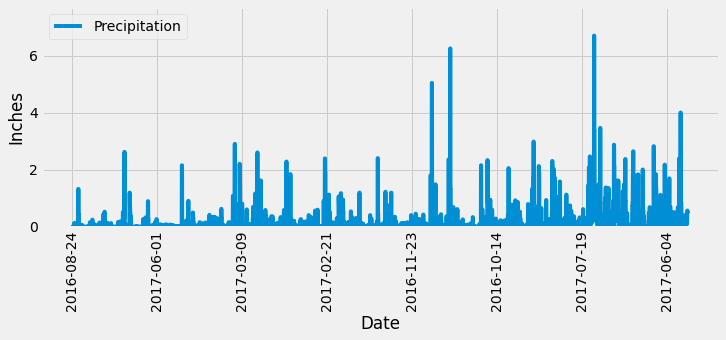

In [64]:
# Use Pandas Plotting with Matplotlib to plot the data
clean_hawaii.plot(x='date',y='prcp', figsize=(10,5), rot='vertical', label="Precipitation")

plt.tight_layout()
min_ylim = clean_hawaii['prcp'].min()
max_ylim = clean_hawaii['prcp'].max()
plt.ylim(min_ylim, max_ylim+1)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [565]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_hawaii.describe()

,prcp
count,18135.000000
mean,0.176462
std,0.460187
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [566]:
# Design a query to show how many stations are available in this dataset?
unique_stations = session.query(station).group_by('station')
for u in unique_stations:
    print(u.station)

USC00511918
USC00513117
USC00514830
USC00516128
USC00517948
USC00518838
USC00519281
USC00519397
USC00519523


In [500]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
combined_tables.groupby([]

ValueError: Grouper for 'station' not 1-dimensional

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
